## Setup

In [ ]:
import sys
from _path import workdir
sys.path.append(workdir)
print(sys.path)

['c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\python312.zip', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\DLLs', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys', '', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\vince\\AppData\\Local\\anaconda3\\envs\\phys\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\vince\\OneDrive - The Chinese University of Hong Kong\\python projects\\py binary orbit\\paper_QPE2005\\..', 'c:\\Users\\vince\\OneDrive - The Chinese University of Hong Kong\\python projects\\py binary orbit\\paper_QPE2005\\..', 'c:\\Users\\vince\\OneDrive - The Chinese University of Hong Kong\\python projects\\py binary orbit\\paper_QPE2005\\..', 'c:\\Users\\vince\\OneDr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from src.util.constants import G, msun, c
from src.orbit.empirical.WDBH_EMRI import rWD, rtide, wf, olapf, rWD_E86
from src.orbit.mapping.single_mode.WD_MBH import s_map_WDBH_MT_expo
from src.orbit.mapping.single_mode.WD_MBH import s_dq
from src.orbit.osculating.orb_avg_formula import de_2_5pn

### Initial parameters

In [ ]:
mWD = 0.5*msun
mBH = 1.e5*msun
Torb = 9.*3600
a0 = (G*(mBH+mWD)*(Torb/2/np.pi)**2)**(1./3)
rt = rtide(mWD,mBH)

m1, r1 = mWD, rWD(mWD)
m2, r2 = mBH, 2*G*mBH/c**2

In [ ]:
w_list1, olap_list1, ell_list1, m_list1 = [wf(mWD)], [olapf(mWD,0.5)], [2], [2]
w_list2, olap_list2, ell_list2, m_list2 = [], [], [], []

q10 = np.zeros(len(w_list1)*len(ell_list1)*len(m_list1))
q20 = np.zeros(len(w_list2)*len(ell_list2)*len(m_list2))

In [ ]:
# rt_factor = 2.75
rt_factor = 2.9
# rt_factor = 2.208860759493671
# rt_factor = 4.0
rp = rt*rt_factor

In [ ]:
# sigma = 9.e-4
sigma = 5.e-4
# sigma = 0.00021544346900318823
# sigma = 1.e-4
mu1 = 1.
ga = 1.
# alpha = 1.
alpha = 1.43

In [ ]:
ef = 0.5

In [ ]:
def max_n_GW(m1,m2,r1,wa,olap,rp,a0,ef):
    dq = s_dq(m1,m2,r1,wa,olap,rp)
    e0 = 1 - rp/a0
    P0K = 2*np.pi*np.sqrt(a0**3/G/(m1+m2))
    nf = int((ef-e0)/de_2_5pn(m1,m2,a0,e0)/P0K)
    return nf

In [ ]:
ntot = int(max_n_GW(m1,m2,r1,w_list1[0],olap_list1[0],rp,a0,ef=ef)*7.5)

In [ ]:
Lacc_eff = 0.1

def P_min(rp):
    return 2*np.pi*rp**3/np.sqrt(G*m2*(2*r1)**3)

def find_Lacc(m1,m2,a,e,sigma):
    rp = np.abs(a*(1-e))
    ga = np.exp(2.-rp/rtide(m1,m2))
    ga = np.where(np.exp(alpha*(2.-rp/rtide(m1,m2))) < 1., np.exp(alpha*(2.-rp/rtide(m1,m2))), 1.)
    return sigma*m1*c**2/P_min(rp)/3 * ga *Lacc_eff

## Mapping

In [ ]:
qn, an, en, m1n, m2n = s_map_WDBH_MT_expo(m1,m2,w_list1[0],olap_list1[0],q10[0],a0,rp,sigma,ga,mu1,ntot\
                                        ,alpha = alpha, q_break= 0.0316, m1_min = 0.1\
                                        ,flag_vary_rp = True, flag_print_msg = True)
n_list = np.array([i+1 for i in range(len(qn))])

e > 1


In [ ]:
time = np.empty_like(qn, dtype=np.float64)
for idx, q in enumerate(qn[:-1]):
    p0 = 2*np.pi*np.sqrt(an[idx]**3/G/(m1n[idx]+m2n[idx]))
    p1 = 2*np.pi*np.sqrt(an[idx+1]**3/G/(m1n[idx+1]+m2n[idx+1]))
    if an[idx+1] < 0.:
        p1 = 0.
    time[idx+1] = time[idx] + (p0+p1)/2

C:\Users\vince\AppData\Local\Temp\ipykernel_17644\1153901250.py:4: RuntimeWarning: invalid value encountered in sqrt
  p1 = 2*np.pi*np.sqrt(an[idx+1]**3/G/(m1n[idx+1]+m2n[idx+1]))


In [ ]:
print(time[np.argmin(np.abs(an*(1-en)/rtide(m1n,m2n)-2.7))]/31536000)
print(an[-1]/an[0])
print(len(qn), ntot)

254.17570385679738
-17.448363739082694
137356 11871082


### Plots

<Figure size 860x640 with 0 Axes>

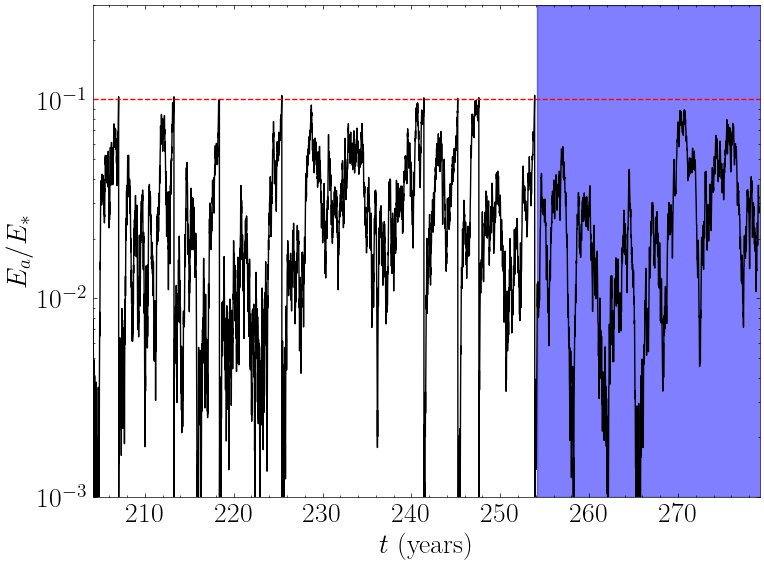

In [ ]:
time_27 = time[np.argmin(np.abs(an*(1-en)/rtide(m1n,m2n)-2.7))]/31536000

plt.figure(figsize=(8.6,6.4), dpi= 100)
_, ax = plt.subplots(figsize=(8.6,6.4), dpi= 100)
plt.style.use('science')
plt.plot(time[:-2]/31536000,np.abs(qn[:-2])**2, linestyle = 'solid', color='black')
ax.axvspan(time_27, time[-1]/31536000, alpha=0.5, color='blue')
plt.axhline(0.1, linestyle = 'dashed', color = 'red')
plt.xlabel(r'$t$ (years)',fontsize=20)
plt.ylabel(r'$E_{a}/E_*$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim([-10., time[-1]/31536000])
# plt.xlim([-10., 85])
# plt.xlim([250., 285])
# plt.xlim([140., 180])
plt.xlim([time_27-50., time_27+25.])
plt.ylim([1.e-3, 3.e-1])
plt.yscale('log')
plt.savefig('Emode_vs_t_MT.pdf', format="pdf")
plt.show()
plt.close()

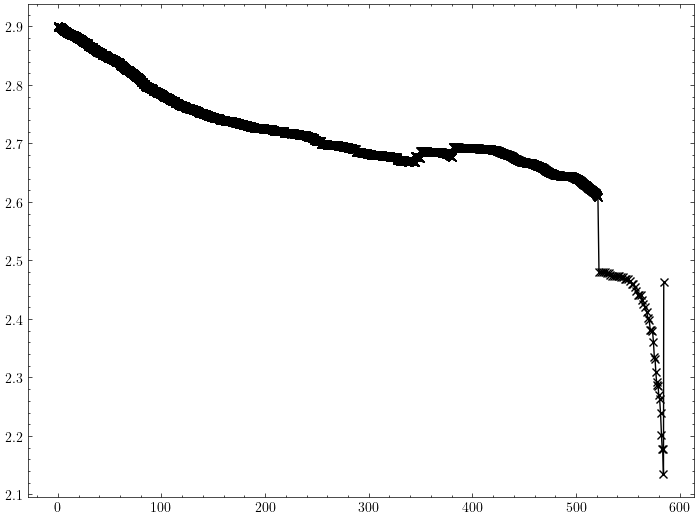

In [ ]:
plt.figure(figsize=(8.6,6.4), dpi= 100)
plt.style.use('science')
plt.plot(time/31536000,an*(1-en)/rtide(m1n,m2n), linestyle = 'solid', color='black', marker='x')
# plt.plot(time/31536000,an*(1-en)/rt, linestyle = 'solid', color='black', marker='x')
# plt.axvline(time[4430]/31536000)
# plt.axvline(time[4601]/31536000)
# plt.yscale('log')
plt.show()
plt.close()

In [ ]:
# plt.figure(figsize=(8.6,6.4), dpi= 100)
# fig, ax = plt.subplots(figsize=(8.6,6.4), dpi= 100)
# plt.style.use('science')
# plt.plot(time/31536000,an*(1-en)/rtide(m1n,m2n), linestyle = 'solid', color='black')
# ax.axvspan(time[np.argmin(np.abs(an*(1-en)/rtide(m1n,m2n)-2.7))]/31536000, xf, alpha=0.5, color='blue')
# plt.xlabel(r'$t$ (years)',fontsize=20)
# plt.ylabel(r'$r_p/R_t$',fontsize=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.xlim([-10., time[-1]/31536000])
# plt.ylim([1., 4.])

# # # Inset
# # # These are in unitless percentages of the figure size. (0,0 is bottom left)
# # idx1 = np.argmin(np.abs(time/31536000-223.))
# # left, bottom, width, height = [0.20, 0.20, 0.44, 0.44]
# # ax2 = fig.add_axes([left, bottom, width, height])
# # ax2.plot(time[idx1:]/31536000, an[idx1:]*(1-en[idx1:])/rtide(m1n[idx1:],m2n[idx1:]), 'k-')
# # ax2.set_xlabel('')
# # ax2.set_ylabel('')
# # ax2.set_xlim([np.ceil(time[idx1]/31536000), time[-1]/31536000])
# # ax2.set_ylim([0.5, 3.])
# # plt.xticks(ticks = np.arange(np.ceil(time[idx1]/31536000), time[-1]/31536000, 0.2), fontsize = 17)
# # plt.yticks(fontsize = 17)

# plt.savefig('rp_vs_t_MT.pdf', format="pdf")
# plt.show()
# plt.close()

In [ ]:
print(an[-1]*(1-en[-1]))
print(rtide(m1n[-1],m2n[-1]))
print(time[-1]/31536000)
print(r1/1.e5)
print(rt/1.e5)
print(w_list1[0]/np.sqrt(G*m1/r1**3))
print(find_Lacc(m1,m2,an[0],1-rp/an[0],sigma))

163057830084.62817
66196172297.56228
584.6869812406223
10629.170568469033
621597.6656938716
1.455
3.989540403895452e+43
